In [1]:
import os
import pandas as pd

# Path to the folder containing the parquet files
parquet_folder = 'neumarkt_parquet'

# List all .parquet files in the folder
parquet_files = [f for f in os.listdir(parquet_folder) if f.endswith('.parquet')]

# Load each parquet file into a DataFrame and store in a dictionary
schedule = {}
for file in parquet_files:
    key = file.replace('.parquet', '')
    schedule[key] = pd.read_parquet(os.path.join(parquet_folder, file))

# Show the keys loaded
print('Loaded parquet files:', list(schedule.keys()))

Loaded parquet files: ['calendar_dates', 'transfers', 'feed_info', 'stops', 'routes', 'agency', 'trips', 'stop_times', 'calendar']


# Statistic analysis of neumarkt bus data

In [2]:
busy_stop = pd.read_csv("busy_stops.csv")

busy_stop = busy_stop.drop(columns=["average"])

# Get the stops dataframe from the loaded parquet files
stops_df = schedule['stops']

def find_stop_id(busy_name):
    match = stops_df[stops_df['stop_name'] == busy_name]
    if not match.empty:
        return match.iloc[0]['stop_id']
    print(f"fail {busy_name}")
    return None

stop_mapping = {
    "Ahntweg": "Rittershof Ahntweg",
    "Bergstr. (Pölling)": "Pölling Bergstr.",
    "Fliederweg": "Pölling Fliederweg",
    "Flugplatz": "Neumarkt Flugplatz",
    "Gasthof Feihl (Pölling)": "Pölling Gasthof Feihl",
    "Johanneszentrum": "Neumarkt Johanneszentrum",
    "Kapellenweg (Rittershof)": "Rittershof Kapellenweg",
    "Klinikum": "Neumarkt Klinikum",
    "Kreuzstr.": "Woffenbach Kreuzstr.",
    "Landratsamt": "Neumarkt Landratsamt",
    "Marienbader Str.": "Pölling Marienbader Str.",
    "Meuselstr.": "Woffenbach Meuselstr.",
    "Neumarkt Bahnhof": "Neumarkt (OPf) Bf",
    "Nibelungenstr.": "Pölling Nibelungenstr.",
    "Nürnberger Str.": "Neumarkt Nürnberger Str.",
    "Oberer Markt": "Neumarkt Oberer Markt",
    "Pöllinger Höhe": "Neumarkt Pöllinger Höhe",
    "Rathaus": "Neumarkt Rathaus",
    "Siedlerstr. (Pölling)": "Pölling Siedlerstr.",
    "Siegfriedstr. (Pölling)": "Pölling Siegfriedstr.",
    "Stadtweg (Pölling)": "Pölling Stadtweg",
    "Volksfestplatz": "Neumarkt Volksfestplatz",
    "Woffenbacher Str.": "Neumarkt Woffenbacher Str.",
    "Am Sand": "Holzheim (b.NM) Am Sand",
    "Heiligenwiesen": "Holzheim (b.NM) Heiligenwiesen",
    "Holzheim Schule": "Holzheim (b.NM) Schule",
    "Maienbreite": "Holzheim (b.NM) Maienbreite",
    "St.-Anna-Str.": "Neumarkt St.-Anna-Str.",
    "Triftstr.": "Holzheim (b.NM) Triftstr.",
    "Altdorfer Str.": "Neumarkt Altdorfer Str.",
    "Altenhof Geschäftszentrum": "Altenhof (NM) Geschäftszentrum",
    "Altenhofweg": "Altenhof (b.NM) Altenhofweg",
    "Am Evangelienstein": "Neumarkt Am Evangelienstein",
    "Breslauer Str.": "Altenhof (b.NM) Breslauer Str.",
    "Eichendorffstr.": "Altenhof (b.NM) Eichendorffstr",
    "Hermann-Stehr-Str.": "Altenhof (b.NM) H.-Stehr-Str.",
    "Johann-Mois-Ring": "Altenhof (b.NM) Joh.-Mois-Ring",
    "Koppenmühlweg": "Altenhof (b.NM) Koppenmühlweg",
    "Kornstr.": "Neumarkt Kornstr.",
    "Landesgartenschau": "Neumarkt Landesgartenschau",
    "Milchhofstr.": "Neumarkt Milchhofstr.",
    "Neuer Markt": "Neumarkt Neuer Markt",
    "Abzw. Regerstr.": "Neumarkt Abzw. Regerstr.",
    "Amberger Str.": "Neumarkt Amberger Str.",
    "EFA-Str.": "Neumarkt EFA-Str.",
    "Faberpark": "Neumarkt Faberpark",
    "Heideweg": "Neumarkt Heideweg",
    "Kapuzinerhölzl": "Neumarkt Kapuzinerhölzl",
    "Karl-Speier-Str.": "Neumarkt Karl-Speier-Str.",
    "Klostertor": "Neumarkt Klostertor",
}

stop_mapping.update({
    "Kohlenbrunnermühlstr.": "Neumarkt Kohlenbrunnermühlstr.",
    "Leipzigerstr.": "Neumarkt Leipziger Str.",
    "Museum Lothar Fischer": "Neumarkt Museum Lothar Fischer",
    "Pelchenhofener Str.": "Neumarkt Pelchenhofener Str.",
    "Pulveräcker": "Neumarkt Pulveräcker",
    "Regerstr.": "Neumarkt Regerstr.",
    "Sachsenstr.": "Neumarkt Sachsenstr.",
    "Schafhof": "Schafhof (b.NM)",
    "Schillerstr.": "Neumarkt Schillerstr.",
    "Schlossbad": "Neumarkt Schlossbad",
    "Theo-Betz-Platz": "Neumarkt Theo-Betz-Platz",
    "Wilhelm-Busch-Str.": "Neumarkt Wilhelm-Busch-Str.",
    "Am Lohgraben": "Neumarkt Am Lohgraben",
    "Birkenweg": "Neumarkt Birkenweg",
    "Egerländer Str.": "Neumarkt Egerländer Str.",
    "Föhrenweg": "Neumarkt Föhrenweg",
    "Ginsterweg": "Neumarkt Ginsterweg",
    "Hutäcker": "Neumarkt Hutäcker",
    "Kettelerstr.": "Neumarkt Kettelerstr.",
    "Saarlandstr.": "Neumarkt Saarlandstr.",
    "Turnerheim": "Neumarkt Turnerheim",
    "Weißenfeldplatz": "Neumarkt Weißenfeldplatz",
    "Zedernweg": "Neumarkt Zedernweg",
    "Badstr.": "Neumarkt Badstr.",
    "Gotenstr.": "Höhenberg (b.NM) Gotenstr.",
    "Höhenberg im Tal": "Höhenberg im Tal (b.NM)",
    "Mariahilfstr.": "Neumarkt Mariahilfstr.",
    "St. Helena": "Helena",
    "Sturmwiese": "Neumarkt Sturmwiese",
    "Ziegelhüttenweg": "Neumarkt Ziegelhüttenweg",
    "Dientzenhoferstr.": "Neumarkt Dientzenhoferstr.",
    "Fa. Klebl": "Lähr Fa. Klebl",
    "Finanzamt": "Neumarkt Finanzamt",
    "Friedhof": "Neumarkt Friedhof",
    "Kerschensteinerstr.": "Neumarkt Kerschensteinerstr.",
    "Nobelstr.": "Neumarkt Nobelstr.",
    "Oberer Lährer Weg": "Neumarkt Oberer Lährer Weg",
    "Regensburger Str.": "Neumarkt Regensburger Str.",
    "Schweningerstr.": "Neumarkt Schweningerstr.",
    "Schönwerthstr.": "Neumarkt Schönwerthstr.",
    "Weinberger Str. / Schule": "Neumarkt Weinberger S./Schule",
    "Wildbadstr.": "Neumarkt Wildbadstr.",
    "Ärztehaus": "Neumarkt Ärztehaus",
    "Berufsschulzentrum": "Neumarkt Berufsschulzentr.",
    "Deininger Weg / Sportz.": "Neumarkt Deininger Weg/Sportz.",
    "Fa. Bionorica": "Neumarkt Fa. Bionorica",
    "Fa. Dehn": "Neumarkt Fa. Dehn",
    "Fa. Pfleiderer": "Neumarkt Fa. Pfleiderer",
    "Förstersteig": "Neumarkt Hasenheide Försterst.",
    "Hasenheide Kirche": "Neumarkt Hasenheide Kirche",
    "Hasenheide Schule": "Neumarkt Hasenheide Schule",
    "Ingolstädter Str.": "Neumarkt Ingolstädter Str.",
    "Ludwig-Wifling-Str.": "Neumarkt Ludwig-Wifling-Str.",
    "Medererstr.": "Neumarkt Medererstr.",
    "Stadtwerke": "Neumarkt Stadtwerke",
    "Alois-Senefelder-Str.": "Stauf (b.NM) A.-Senefelder-S.",
    "Fa. Aptiv": "Neumarkt Fa. Aptiv",
    "Freystädter Str.": "Neumarkt Freystädter Str.",
    "Gansbrauerei": "Neumarkt Gansbrauerei",
    "Klebl Bauzentrum": "Neumarkt Klebl Bauzentr.",
    "Max-Künzel-Str.": "Neumarkt Max-Künzel-Str.",
    "Moosweiherstr.": "Stauf (b.NM) Moosweiherstr.",
    "Ramoldplatz (Berngau)": "Berngau Ramoldplatz",
    "Rebhuhnstr.": "Woffenbach Rebhuhnstr.",
    "Reifenstein (Berngau)": "Berngau Reifenstein",
    "Renauweg (Stauf)": "Stauf (b.NM) Renauweg",
    "Schlossstr.": "Woffenbach Schloßstr.",
    "Stauf Kirche": "Stauf (b.NM) Kirche",
    "Wallensteinstr.": "Neumarkt Wallensteinstr.",
    "Am Letten": "Woffenbach Am Letten",
    "BRK-Altenheim": "Woffenbach BRK-Altenheim",
    "Tyrolsberger Str.": "Woffenbach Tyrolsberger Str.",
    "Abzw. Holzheim": "Abzw. Holzheim (b.NM)",
    "Blomenhofstr.": "Neumarkt Blomenhofstr.",
    "Lippertshofen": "Lippertshofen Ort",
    "Wolfstein Burgruine": "Wolfstein Hl. Kreuz",
})

busy_stop["stop_name"] = busy_stop["stop_name"].replace(stop_mapping)
busy_stop = busy_stop[busy_stop["stop_name"] != "Berngau Ramoldplatz"]
busy_stop = busy_stop[busy_stop["stop_name"] != "Berngau Reifenstein"]

busy_stop['stop_id'] = busy_stop['stop_name'].apply(find_stop_id)

# add the weekday sum
grouped = busy_stop.groupby('stop_id')['weekday'].transform('sum')
busy_stop['weekday_sum'] = grouped
busy_stop.head()

# Add latitude and longitude to busy_stop from stops_df based on stop_id
# Assumes stops_df has columns 'stop_id', 'stop_lat', 'stop_lon'
busy_stop = busy_stop.merge(
    stops_df[['stop_id', 'lat', 'lon']],
    on='stop_id',
    how='left'
)
busy_stop = busy_stop.rename(columns={'stop_lat': 'lat', 'stop_lon': 'long'})


Index(['linie', 'stop_name', 'weekday', 'stop_id', 'weekday_sum', 'lat',
       'lon'],
      dtype='object')

In [3]:
# Create stop_stats: first row per unique stop_id, drop 'weekday', rename 'weekday_sum' to 'weekday'
stop_stats = busy_stop.drop_duplicates(subset='stop_id', keep='first').drop(columns=['weekday', "linie"])
stop_stats = stop_stats.rename(columns={'weekday_sum': 'weekday'})

# Ensure stop_times is a DataFrame from schedule
df_stop_times = schedule["stop_times"]

# Filter stop_times for trip_id containing 'UH'
uh_trips = df_stop_times[df_stop_times["trip_id"].str.contains("UH")]

# Count number of such trips per stop_id
bus_per_day_counts = uh_trips.groupby("stop_id").size()

# Map counts to stop_stats, fill missing with 0
stop_stats["bus_per_day"] = stop_stats["stop_id"].map(bus_per_day_counts).fillna(0).astype(int)

stop_stats = stop_stats.rename(columns={"weekday":"passenger_per_day"})

#stop_stats.to_csv("stop_stats.csv")

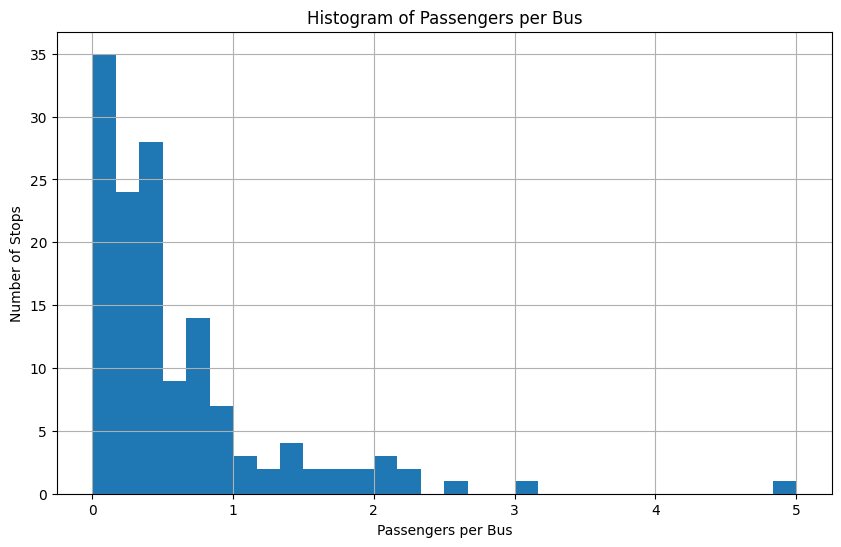

In [5]:
# Calculate 'avg_passenger_per_bus' and plot histogram

stop_stats['avg_passenger_per_bus'] = stop_stats['passenger_per_day'] / stop_stats['bus_per_day']
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
stop_stats['avg_passenger_per_bus'].hist(bins=30)
plt.xlabel('Passengers per Bus')
plt.ylabel('Number of Stops')
plt.title('Histogram of Passengers per Bus')
plt.grid(True)
plt.show()

In [15]:
stop_stats['delta_to_ideal_utilization_(0.5_per_bus)'] = stop_stats['avg_passenger_per_bus'] - 0.5

In [ ]:
stop_stats.to_csv("data/stop_stats.csv")

In [28]:
# pip install geopandas contextily matplotlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap
import contextily as cx

def plot_stops_static(df: pd.DataFrame, color_by="bus_per_day", point_size=25, cmap_name="plasma", 
                      less_contrast=False, hot="", cold="", title="", ticks=None):
    """Plot bus stops on a map, colored by a data column.

    Args:
        df (pd.DataFrame): DataFrame containing bus stop data with 'lat' and 'lon' columns for coordinates.
        color_by (str): Column name to color the points by. Default is "bus_per_day".
        point_size (int): Size of the points on the plot. Default is 25.
        cmap_name (str): Name of the colormap to use. Default is "plasma".
        less_contrast (bool): If True, uses a less contrasty color normalization (e.g., logarithmic). Default is False.

    Returns:
        None: Displays a plot with bus stops colored by the specified data column.
    """
    # Build GeoDataFrame in WGS84 (lat/lon), then to Web Mercator for web tiles
    gdf = gpd.GeoDataFrame(
        df.copy(),
        geometry=gpd.points_from_xy(df["lon"], df["lat"]),
        crs="EPSG:4326"
    ).to_crs("EPSG:3857")

    # Color mapping
    values = gdf[color_by].astype(float)
    if less_contrast:
        from matplotlib.colors import PowerNorm
        norm = PowerNorm(gamma=0.5, vmin=values.min(), vmax=values.max())
    else:
        norm = Normalize(vmin=values.min(), vmax=values.max())
    cmap = get_cmap(cmap_name)
    colors = cmap(norm(values))

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color=colors, markersize=point_size, linewidth=0, alpha=0.9)

    # Add a nice basemap (Carto light). Other good ones: ctx.providers.Stamen.Terrain
    cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
    

    # Make legend from the colormap
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
    cbar.set_label(color_by.replace("_", " "))
    if ticks is not None:
        cbar.set_ticks(ticks)

    # Add text near max
    cbar.ax.text(
        1.3, 0.9, hot, transform=cbar.ax.transAxes,
        ha='left', va='center', fontweight='bold')

    # Add text near min
    cbar.ax.text(
        1.3, 0.1, cold, transform=cbar.ax.transAxes,
        ha='left', va='center', fontweight='bold')

    ax.set_axis_off()
    ax.set_title(title)
    plt.tight_layout()
    plt.show()



In [36]:
stop_stats

,stop_name,stop_id,passenger_per_day,lat,lon,bus_per_day,avg_passenger_per_bus,diff_to_ideal_passenger,delta_to_ideal_utilization_(0.5_per_bus)
0,Rittershof Ahntweg,de:09373:17157:0:1,8.7,49.283242,11.408101,12,0.725000,0.225000,0.225000
1,Pölling Bergstr.,de:09373:17171:0:1,16.3,49.290308,11.414093,32,0.509375,0.009375,0.009375
2,Pölling Fliederweg,de:09373:17174:0:1,18.3,49.291035,11.424405,9,2.033333,1.533333,1.533333
3,Neumarkt Flugplatz,de:09373:17033:0:1,8.8,49.286904,11.447753,24,0.366667,-0.133333,-0.133333
4,Pölling Gasthof Feihl,de:09373:17175:0:1,50.6,49.292998,11.416581,24,2.108333,1.608333,1.608333
...,...,...,...,...,...,...,...,...,...
190,Fuchsberg,de:09373:17144:0:1,0.0,49.285258,11.505973,3,0.000000,-0.500000,-0.500000
191,Karhof,de:09373:17145:0:1,0.0,49.281748,11.518145,3,0.000000,-0.500000,-0.500000
192,Lampertshofen,de:09373:17151:0:1,0.0,49.293291,11.550861,3,0.000000,-0.500000,-0.500000
193,Lippertshofen Ort,de:09373:17153:0:1,0.0,49.281759,11.549316,3,0.000000,-0.500000,-0.500000


/tmp/ipykernel_266427/2316361017.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(cmap_name)


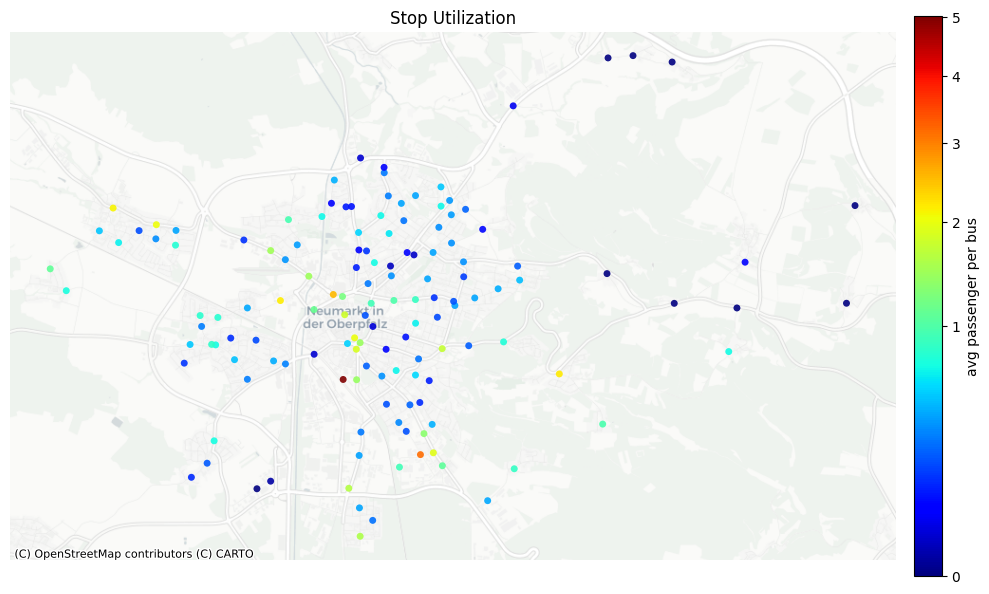

In [9]:

title = "Stop Utilization"
plot_stops_static(stop_stats, color_by="avg_passenger_per_bus", cmap_name="jet", less_contrast=True, title=title)#, hot="high", cold ="low")


/tmp/ipykernel_266427/1594399972.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(cmap_name)


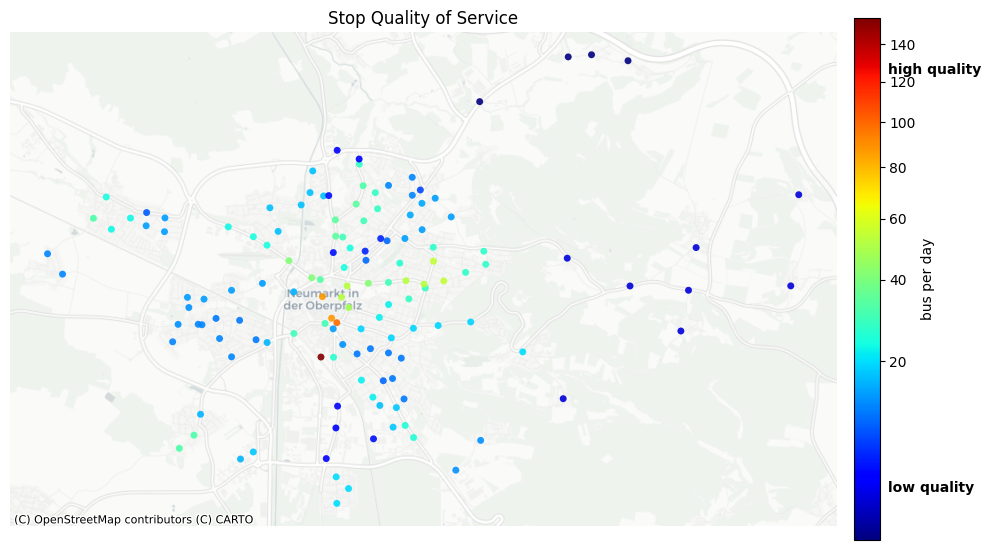

In [31]:
title = "Stop Quality of Service"
plot_stops_static(stop_stats, color_by="bus_per_day", cmap_name="jet",
                   less_contrast=True, title=title, hot="High Quality",
                     cold ="Low Quality")

/tmp/ipykernel_266427/1594399972.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(cmap_name)


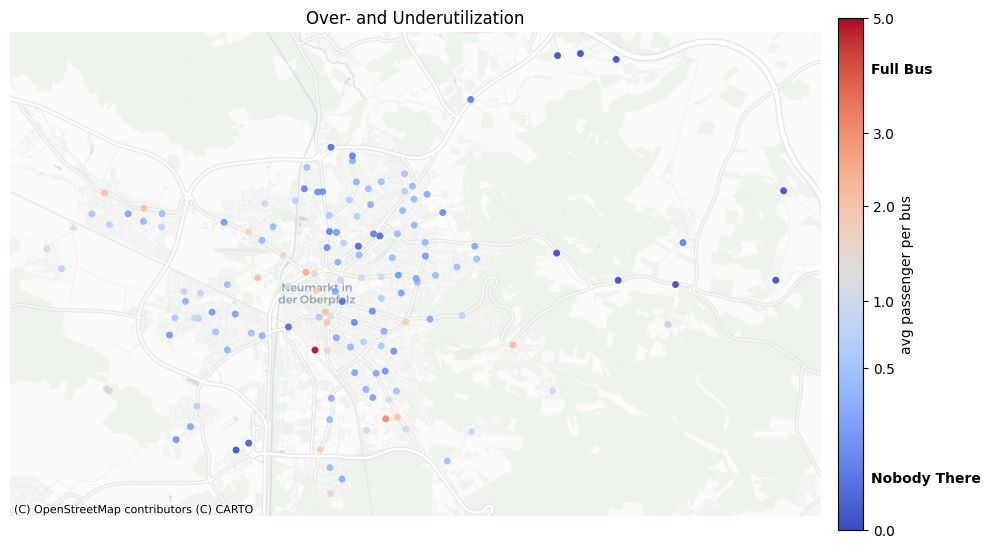

In [35]:
title = "Over- and Underutilization"
plot_stops_static(stop_stats, color_by="avg_passenger_per_bus", 
                  cmap_name="coolwarm", less_contrast=True, title=title, hot="Full Bus", 
                  cold ="Nobody There", ticks=[0,0.5,1,2,3,5])


In [42]:
# Create a new DataFrame 'line_stats' with one row per unique 'linie' in busy_stop
# and a column 'avg_weekday' as the average of all 'weekday' values for that 'linie'
import pandas as pd

line_stats = busy_stop.groupby('linie', as_index=False)['weekday'].mean()
line_stats = line_stats.rename(columns={'weekday': 'passengers_per_day_per_stop'})
line_stats.to_csv("data/line_stats.csv")

line_stats

,linie,passengers_per_day_per_stop
0,561,23.195652
1,562,21.009091
2,563,21.676471
3,564,10.447619
4,565,16.161905
5,566,23.640000
6,567,12.180000
7,568,19.288889
8,569,6.400000
9,570,14.166667
